# Análisis de patrones en Siniestros para Desarrollo de Regulativas efectivas. 

Este conjunto de datos, esta proporcionado por la aseguradora AFP Crecer para la competencia de Visualizacion de Datos e Inteligencia Artificial de la competencia de la sociedad de Ciencia de Datos del año 2023, donde se presentaba varios datasets relacionado al historial registrado de diferentes accidentes automovilisticos, los cuales iban desde el 2014 hasta el 2023. 

# Objetivo del proyecto: 
Identificar y analizar los patrones y tendencias en los siniestros automovilisticos mediante el uso de tecnicas de análisis de datos, permitiendo desarrollar soluciones financieras y regulativas que mejoren la gestión de riesgos, optimicen políticas de seguros y forlalezcan las regulaciones de la seguridad vial. 

# Procedimientos:
Se procedio a unificar la data de las hojas de los datasets a otro archivo .ipynb, llamado "data.ipynb", en las columnas del dataset se encuentra almacenada la siguiente información: 

SEXO: Sexo de la persona implicada en el siniestro, pudiendo ser F (Femenino) o M(Masculino)

RANGO DE EDAD: Rango de edad de las personas implicados en el siniestro. 

NACIONALIDAD:  Nacionalidad de la persona implicada en el Siniestro. 

SECTOR: Sector al que se dedica la persona implicada en el siniestro. 

ACTIVIDAD: Actividad que realiza el implicado para subsistir. 

TIPO_VEHICULO: Tipo de Vehiculo implicado en el accidente. 

COLOR: Color del Vehiculo implicado en el accidente. 

MARCA: Marca del auto que esta implicado el vehiculo. 

MODELO: Qué tipo de modelo de la marca esta implicado. 

AÑO AUTO: Año del modelo del auto. 

TIPO TRANSIMISION: Tipo de transmisión del auto implicado en el siniestro. 

FE OCURRENCIA: Fecha en el que ocurrio el siniestro

DE LUGAR OCURRENCIA: Donde ocurrio el incidente. 

DE CAUSA DETALLE: Qué causó el siniestro en primer lugar. 

EVENTO CATASTROFICO: Qué ocurrió en el siniestro.

DE CIUDAD: Ciudad donde ocurrió el siniestro. 

PROVINCIA: Donde ocurrio el siniestro. 

HORA DE SINIESTRO: Hora en el que ocurrió el siniestro.

# Preguntas que buscamos responder de este conjunto
¿Cuántos siniestros han sido registrados? 

¿Cuál ha sido la distribución de los siniestros a traves de los años? 

 ¿Cuál es la distribución de siniestros por sexo? 

 ¿Cómo varía el número de siniestros según el rango de edad? 

 ¿Qué sectores tienen más incidencias de siniestros? 

 ¿Cuáles son las actividades más comunes que realizan las personas implicadas en siniestros?

¿Cuál es la distribución de tipos de vehículos implicados en siniestros? 

¿Cuáles colores de vehículos están más frecuentemente implicados en siniestros? 

¿Qué marcas y modelos de autos tienen más siniestros? 

¿Qué tipo de transmisión están más frecuentemente implicadas en siniestros?

¿Hay algún patrón en la edad de los vehículos implicados en siniestros? 

¿Existen diferencias significativas en la tasa de siniestros entre hombres y mujeres?

¿Cuál es la distribución de siniestros a lo largo del tiempo? 

¿Existen patrones estacionales con respecto a la ocurrencia de siniestros? 

¿Qué días de a semana tienen la mayor incidencia de siniestros?

¿En qué ciudades ocurren más siniestros?

¿Cuáles son las causas más comunes de los siniestros? 

¿Qué tipo de eventos catastróficos son más frecuentes? 

¿Se observan tendencias en las causas de los siniestros a lo largo del tiempo?

In [1]:
%pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
#importar librerias 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats

In [4]:
#cargar el conjunto de datos
with pd.ExcelFile("data_siniestro.xlsx") as xls:
    sheet_names = xls.sheet_names
print(sheet_names)
dataframe= pd.read_excel("data_siniestro.xlsx")

['Sheet1']


# Analisis de Siniestros 

Un siniestro automovilistico, también conocido como accidente automovilistico, que ocurre sobre la vía y se presenta súbita e inesperadamente, determinado por condiciones y actos irresponsables potencialmente previsibles, atribuidos a factores humanos, vehículos preponderantemente automotores, condiciones climatológicas, señalización y caminos, los cuales ocasionan pérdidas prematuras de vidas humanas y/o lesiones, así como secuelas, físicas o psicológicas, perjuicios materiales y daños a terceros.




1. ¿Cuántos siniestros han sido registrados? 

In [5]:
#contar la cantidad de siniestros registrados
numregistros = dataframe["ID _ SINIESTRO"].nunique()
print(f"El total de registros de siniestros es : {numregistros}")

El total de registros de siniestros es : 18288


2. ¿Cuál ha sido la distribución de los siniestros a traves de los años?

In [6]:
# Primero agrupamos los datos por año y luego se cuentan los siniestros. 
dataframe.groupby(dataframe['FE_OCURRENCIA'].dt.year).size().reset_index(name='CANTIDAD DE SINIESTROS POR AÑO') #reset_index es para darle formato de tabla 

,FE_OCURRENCIA,CANTIDAD DE SINIESTROS POR AÑO
0,2014,97
1,2015,1124
2,2016,2169
3,2017,2654
4,2018,2318
5,2019,2084
6,2020,1524
7,2021,2364
8,2022,2695
9,2023,1259


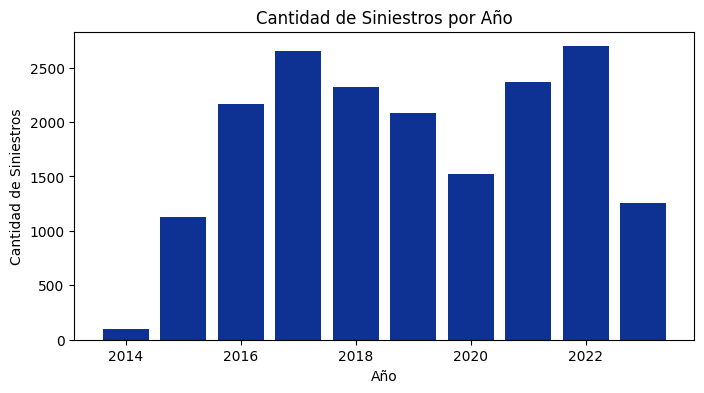

In [7]:
siniestros_por_año =dataframe.groupby(dataframe['FE_OCURRENCIA'].dt.year).size().reset_index(name='CANTIDAD DE SINIESTROS POR AÑO') 
plt.figure(figsize=(8, 4))
plt.bar(siniestros_por_año['FE_OCURRENCIA'], siniestros_por_año['CANTIDAD DE SINIESTROS POR AÑO'], color='#0d3293')
plt.xlabel('Año')
plt.ylabel('Cantidad de Siniestros')
plt.title('Cantidad de Siniestros por Año')
plt.show()

3. ¿Cuál es la distribución de siniestros por sexo? 


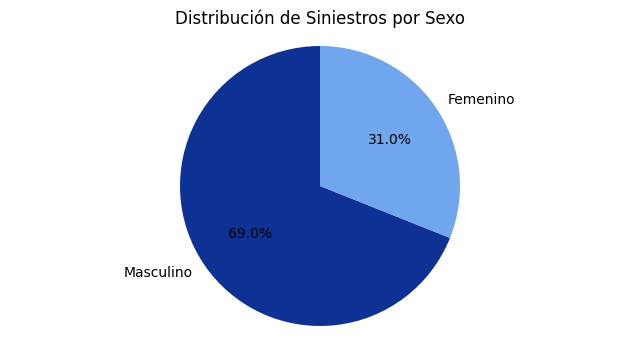

In [8]:
dataframe['CD_SEXO'] = dataframe['CD_SEXO'].replace({'F': 'Femenino', 'M': 'Masculino'}) #reemplazar valores f por femenino y m por masculino
distribucion_sin_sexo= dataframe['CD_SEXO'].value_counts() #contar el total de valores

#crear grafico de pastel
plt.figure(figsize=(8, 4))
plt.pie(distribucion_sin_sexo, labels=distribucion_sin_sexo.index, autopct='%1.1f%%', startangle=90, colors=['#0d3293','#6fa6ed'])
plt.title('Distribución de Siniestros por Sexo')
plt.axis('equal')  
plt.show()

4. ¿Cómo varía el numero de siniestros segun el rango de edad? 

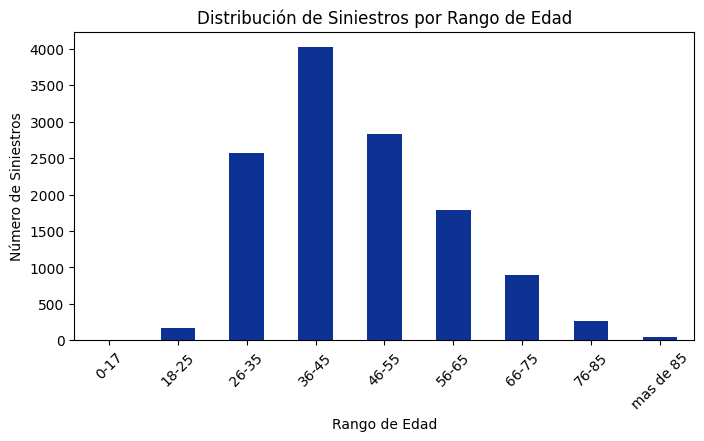

In [9]:
# Eliminar filas donde 'RANGO DE EDAD' está en blanco o es 0
data_filtered = dataframe[(dataframe['Rango de Edad'] != ' ') & (dataframe['Rango de Edad'] != '') & (dataframe['Rango de Edad'] != 0)]

# Contar los siniestros por rango de edad
siniestros_por_edad = data_filtered['Rango de Edad'].value_counts().sort_index()

# Crear el histograma
plt.figure(figsize=(8, 4))
siniestros_por_edad.plot(kind='bar', color='#0d3293')
plt.xlabel('Rango de Edad')
plt.ylabel('Número de Siniestros')
plt.title('Distribución de Siniestros por Rango de Edad')
plt.xticks(rotation=45)
plt.show()

5. ¿Qué sectores tienen más incidencias en siniestros? 


In [10]:
# Filtrar los datos
data_filtered = dataframe[(dataframe['De_Sector'] != ' ') & (dataframe['De_Sector'] != '') & (dataframe['De_Sector'] != 0)]

# Contar siniestros por sector
siniestros_sector = data_filtered['De_Sector'].value_counts()
top_sectores = siniestros_sector.head(3)  #generar el top3 de sectores donde más ocurren siniestros

# Generar una tabla de los sectores implicados en siniestros
tabla_top_sectores = top_sectores.reset_index()
tabla_top_sectores.index = tabla_top_sectores.index + 1
tabla_top_sectores.columns = ['Sectores', 'Total de Siniestros']

print(tabla_top_sectores)

     Sectores  Total de Siniestros
1   Servicios                 1374
2  Industrial                  498
3   Comercial                  442


6. ¿Cuáles son las actividades más comunes que realizan las personas implicadas en siniestros?

In [11]:
data_filtered = dataframe[(dataframe['DE_ACTIVIDAD'] != ' ') & (dataframe['DE_ACTIVIDAD'] != '') & (dataframe['DE_ACTIVIDAD'] != 0)  & (dataframe['DE_ACTIVIDAD'] != 'Otro')]
# Contar las actividades más comunes
actividades_comunes = data_filtered['DE_ACTIVIDAD'].value_counts().reset_index()
actividades_comunes.columns = ['DE_ACTIVIDAD', 'COUNT']
actividades_comunes_top12 = actividades_comunes.head(12)

# Crear un TreeMap
fig = px.treemap(actividades_comunes_top12, path=['DE_ACTIVIDAD'], values='COUNT',
                 title='Actividades Más Comunes en Siniestros')
fig.show()

7. ¿Cuál es la distribución de tipos de vehículos implicados en siniestros? 

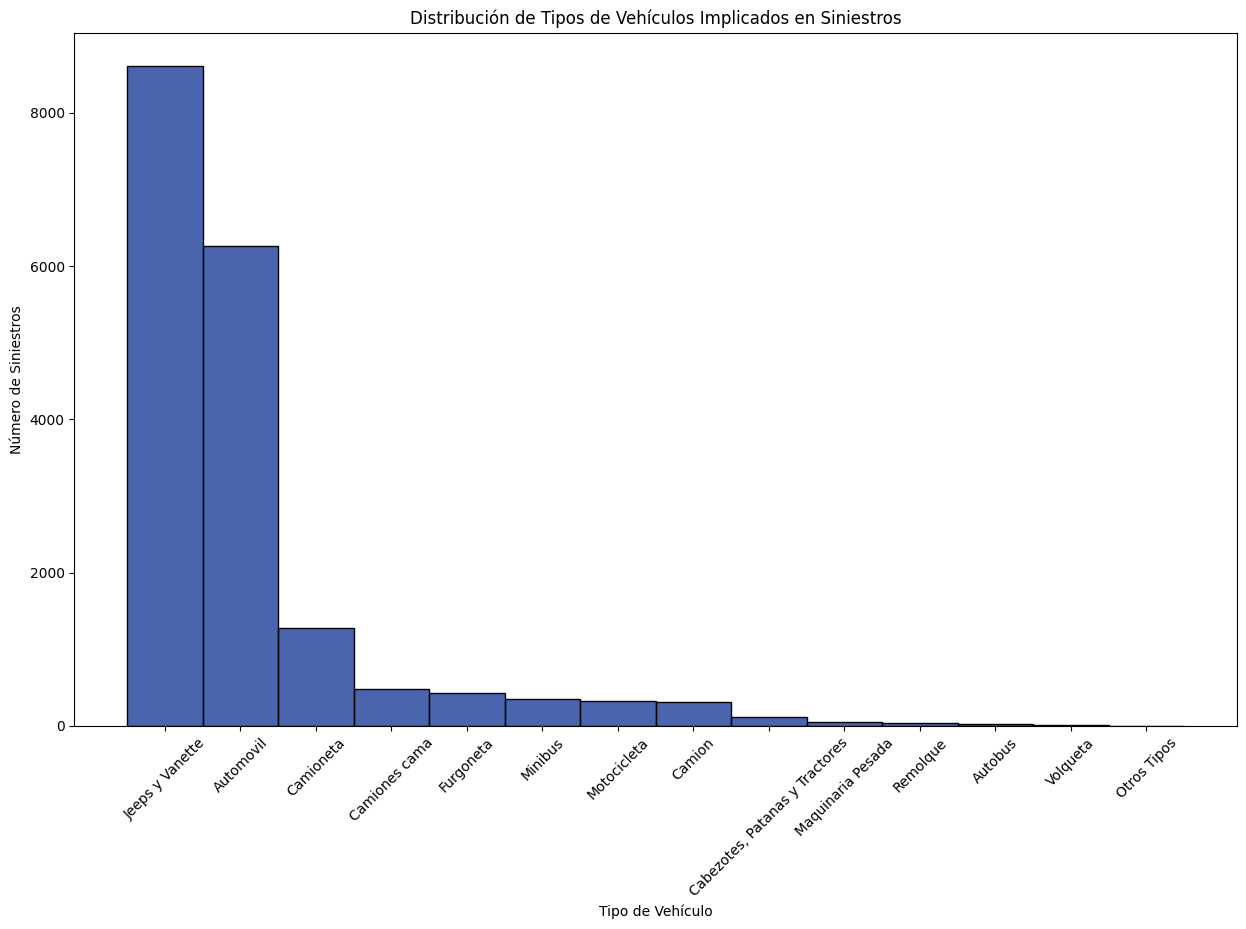

In [12]:
data_filtered = dataframe[(dataframe['TIPO_VEHICULO'] != ' ') & (dataframe['TIPO_VEHICULO'] != '') & (dataframe['TIPO_VEHICULO'] != 0)]

# Contar las ocurrencias de cada tipo de vehículo
tipo_vehiculo_counts = data_filtered['TIPO_VEHICULO'].value_counts()

# Crear una nueva columna para mantener el orden
data_filtered['TIPO_VEHICULO'] = pd.Categorical(data_filtered['TIPO_VEHICULO'], categories=tipo_vehiculo_counts.index, ordered=True)

# Configuración del gráfico
plt.figure(figsize=(15, 9))
sns.histplot(data=data_filtered, x='TIPO_VEHICULO', discrete=True, color='#0d3293')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Número de Siniestros')
plt.title('Distribución de Tipos de Vehículos Implicados en Siniestros')
plt.xticks(rotation=45)
plt.show()

8. ¿Cuáles colores de vehículos están más frecuentemente implicados en siniestros? 

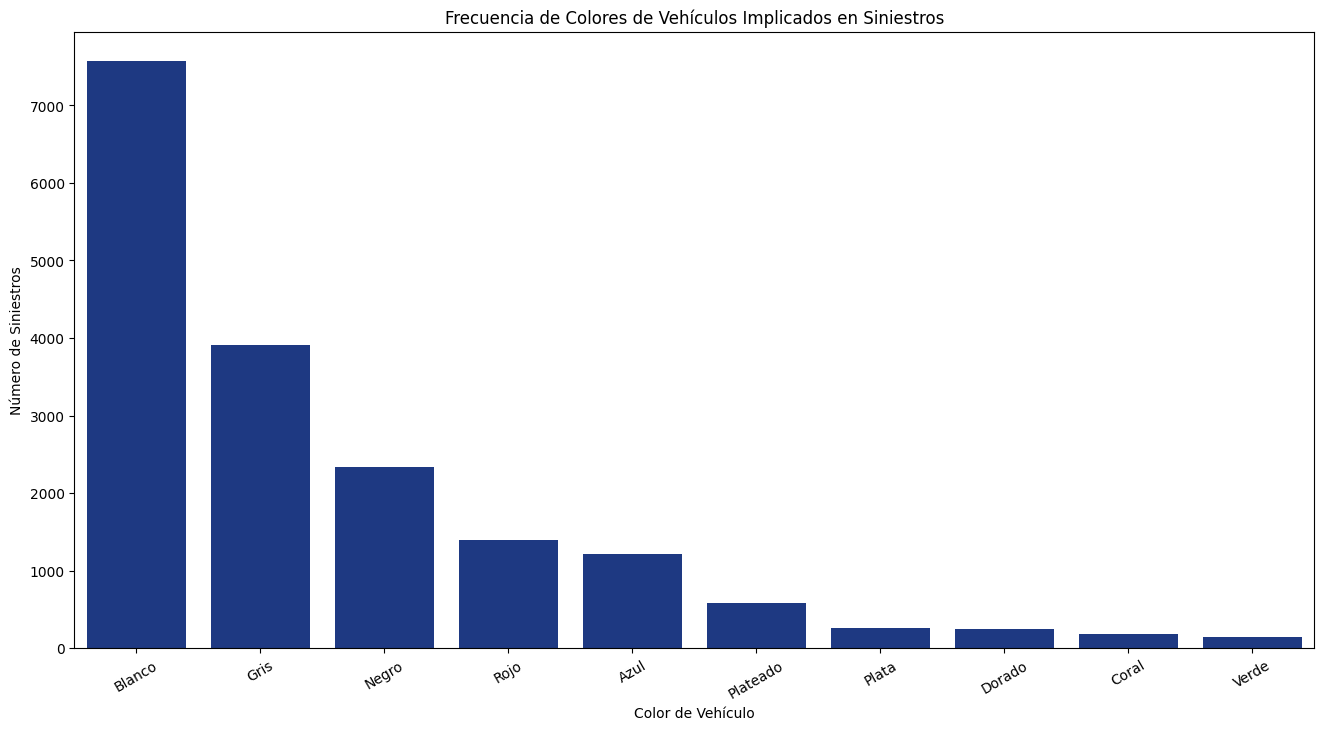

In [13]:
# Contar las ocurrencias de cada color de vehículo
color_counts = dataframe['Color'].value_counts()
top_colores = color_counts.head(10)
# Configuración del gráfico
plt.figure(figsize=(16, 8))
sns.barplot(x=top_colores.index, y=top_colores.values, color='#0d3293')

# Etiquetas y título
plt.xlabel('Color de Vehículo')
plt.ylabel('Número de Siniestros')
plt.title('Frecuencia de Colores de Vehículos Implicados en Siniestros')
plt.xticks(rotation=30)
plt.show()


9. ¿Qué marca y que modelos de autos tienen más siniestros?

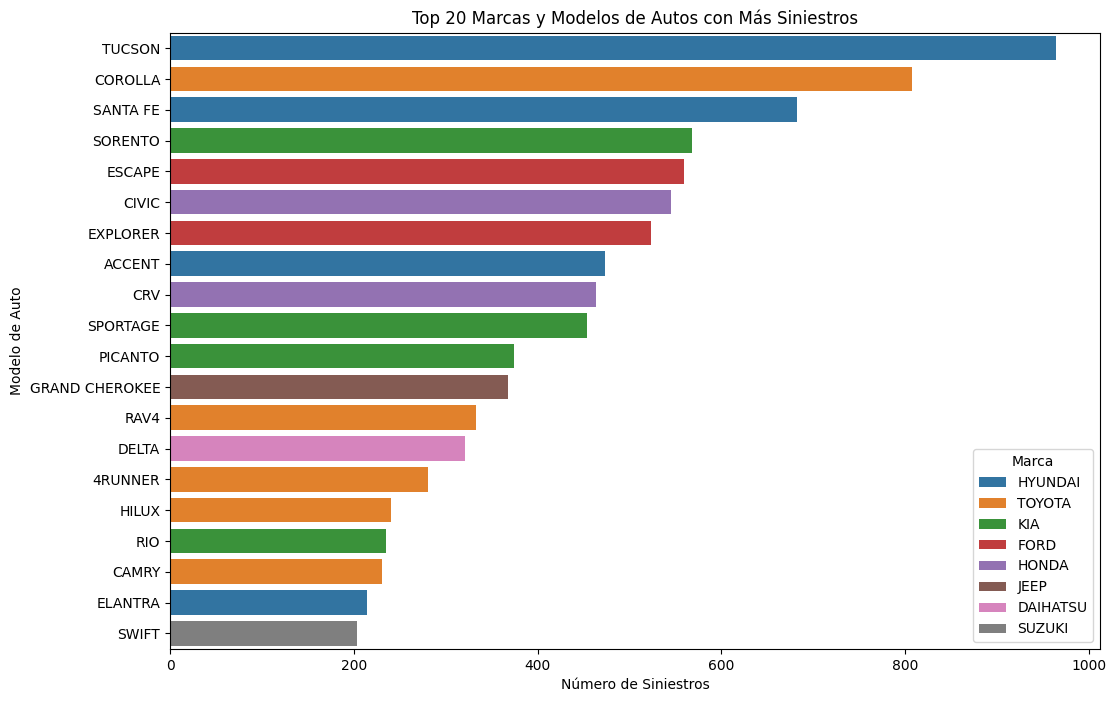

In [14]:
# Contar las ocurrencias de cada combinación de marca y modelo
marca_modelo_counts = dataframe.groupby(['Marca', 'Modelo']).size().reset_index(name='ID _ SINIESTRO')

# Ordenar por el número de siniestros
marca_modelo_counts = marca_modelo_counts.sort_values(by='ID _ SINIESTRO', ascending=False).head(20)  # Obtener las 20 combinaciones más comunes

# Configuración del gráfico
plt.figure(figsize=(12, 8))
sns.barplot(data=marca_modelo_counts, x='ID _ SINIESTRO', y='Modelo', hue='Marca', dodge=False)
plt.xlabel('Número de Siniestros')
plt.ylabel('Modelo de Auto')
plt.title('Top 20 Marcas y Modelos de Autos con Más Siniestros')
plt.legend(title='Marca')
plt.show()

10. ¿Qué tipo de transmisión están más frecuentemente implicadas en siniestros?

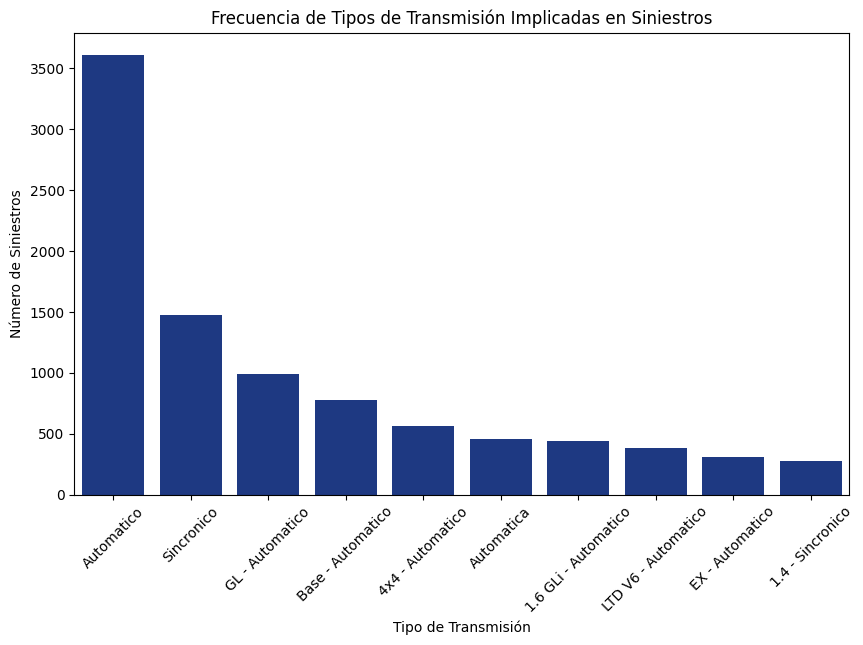

In [15]:
# Filtrar filas
data_filtered = dataframe.dropna(subset=['Tipo Transmision', 'ID _ SINIESTRO'])
data_filtered = data_filtered[(data_filtered['Tipo Transmision'] != '') & (data_filtered['ID _ SINIESTRO'] != '')]

# Contar las ocurrencias de cada tipo de transmisión
transmision_counts = data_filtered['Tipo Transmision'].value_counts()
top_transmision = transmision_counts.head(10) #mostrar los 10 tipos de transmision con más datos

# Configuración del gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=top_transmision.index, y=top_transmision.values, color='#0d3293')
plt.xlabel('Tipo de Transmisión')
plt.ylabel('Número de Siniestros')
plt.title('Frecuencia de Tipos de Transmisión Implicadas en Siniestros')
plt.xticks(rotation=45)
plt.show()

12. ¿Hay algún patrón en la edad de los vehículos implicados en siniestros? 



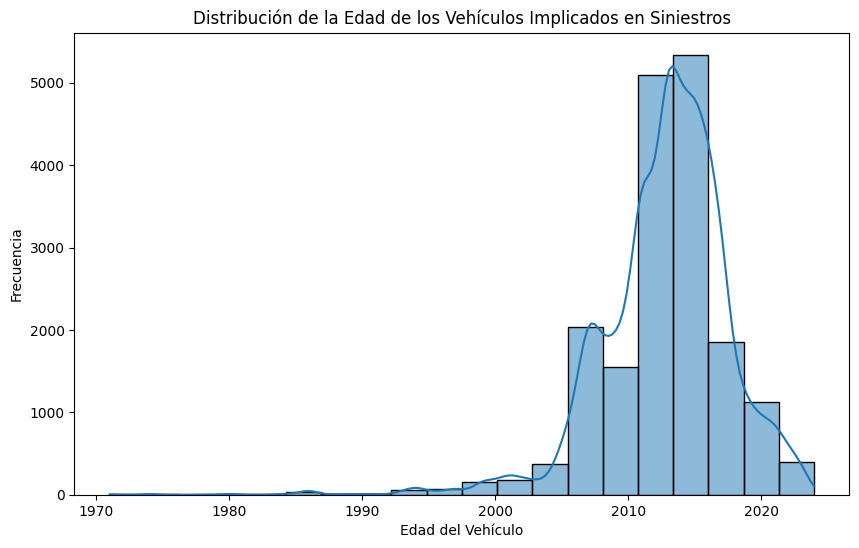

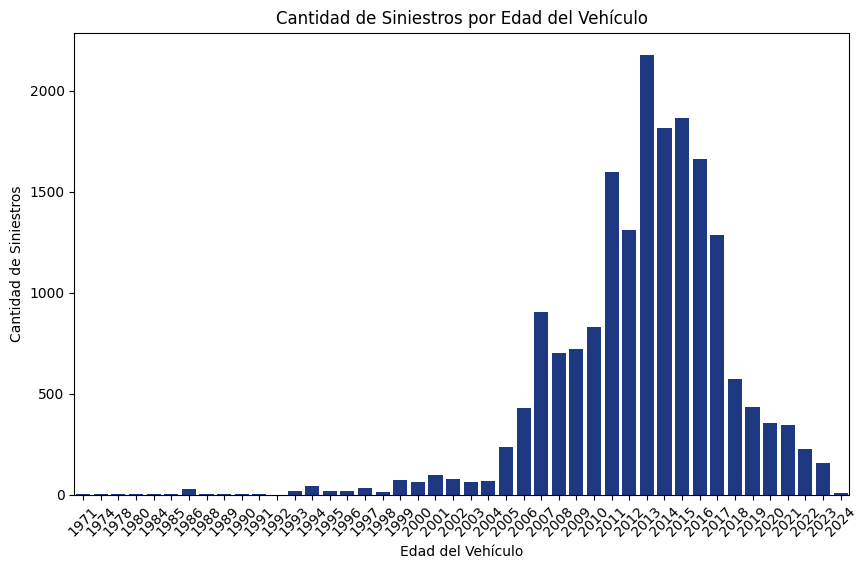

In [16]:
# Visualizar la distribución de la edad de los vehículos implicados en siniestros
plt.figure(figsize=(10, 6))
sns.histplot(dataframe['Año'], bins=20, kde=True)
plt.title('Distribución de la Edad de los Vehículos Implicados en Siniestros')
plt.xlabel('Edad del Vehículo')
plt.ylabel('Frecuencia')
plt.show()

# Agrupar por edad del vehículo y contar la cantidad de siniestros
age_accident_count = dataframe.groupby('Año').size().reset_index(name='ID _ SINIESTRO')

# Visualizar los resultados
plt.figure(figsize=(10, 6))
sns.barplot(x='Año', y='ID _ SINIESTRO', data=age_accident_count, color= "#0d3293")
plt.title('Cantidad de Siniestros por Edad del Vehículo')
plt.xlabel('Edad del Vehículo')
plt.ylabel('Cantidad de Siniestros')
plt.xticks(rotation=45)
plt.show()

# Calcular y mostrar la correlación
correlation = dataframe['Año'].corr(dataframe['ID _ SINIESTRO'])

In [17]:
# Calcular y mostrar la correlación
correlation = dataframe['Año'].corr(dataframe['ID _ SINIESTRO'])
print(f'Correlación entre la edad del vehículo y la cantidad de siniestros: {correlation}')

Correlación entre la edad del vehículo y la cantidad de siniestros: 0.3249300516942465



13. ¿Existen diferencias significativas en la tasa de siniestros entre hombres y mujeres?


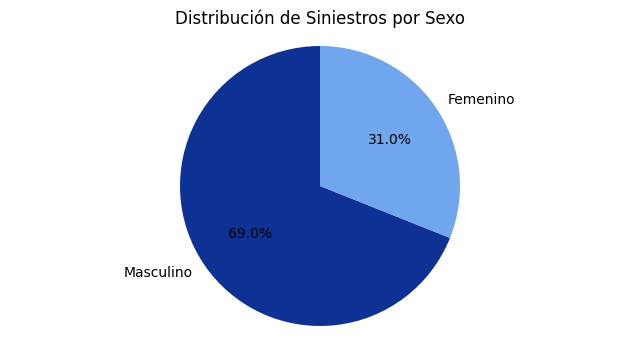

T-statistic: -2.94701034699996, P-value: 0.0032126749328197906
Existen diferencias significativas en la tasa de siniestros entre hombres y mujeres.


In [18]:
# Reemplazar valores 'F' por 'Femenino' y 'M' por 'Masculino'
dataframe['CD_SEXO'] = dataframe['CD_SEXO'].replace({'F': 'Femenino', 'M': 'Masculino'})

# Visualizar la distribución de siniestros por género
distribucion_sin_sexo = dataframe['CD_SEXO'].value_counts()
plt.figure(figsize=(8, 4))
plt.pie(distribucion_sin_sexo, labels=distribucion_sin_sexo.index, autopct='%1.1f%%', startangle=90, colors=['#0d3293', '#6fa6ed'])
plt.title('Distribución de Siniestros por Sexo')
plt.axis('equal')
plt.show()

# Filtrar los datos por género
male_accidents = dataframe[dataframe['CD_SEXO'] == 'Masculino']['ID _ SINIESTRO']
female_accidents = dataframe[dataframe['CD_SEXO'] == 'Femenino']['ID _ SINIESTRO']

# Realizar una prueba t de Student
t_stat, p_value = stats.ttest_ind(male_accidents, female_accidents)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

# Interpretar los resultados
if p_value < 0.05:
    print("Existen diferencias significativas en la tasa de siniestros entre hombres y mujeres.")
else:
    print("No existen diferencias significativas en la tasa de siniestros entre hombres y mujeres.")


14. ¿Existen patrones estacionales con respecto a la ocurrencia de siniestros? 


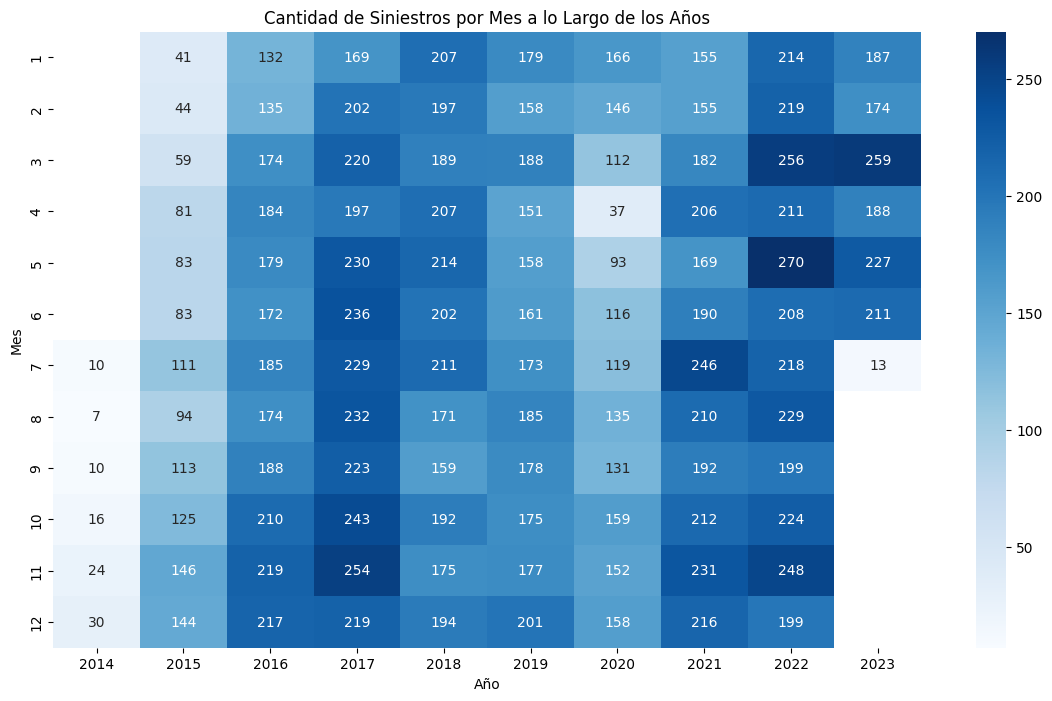

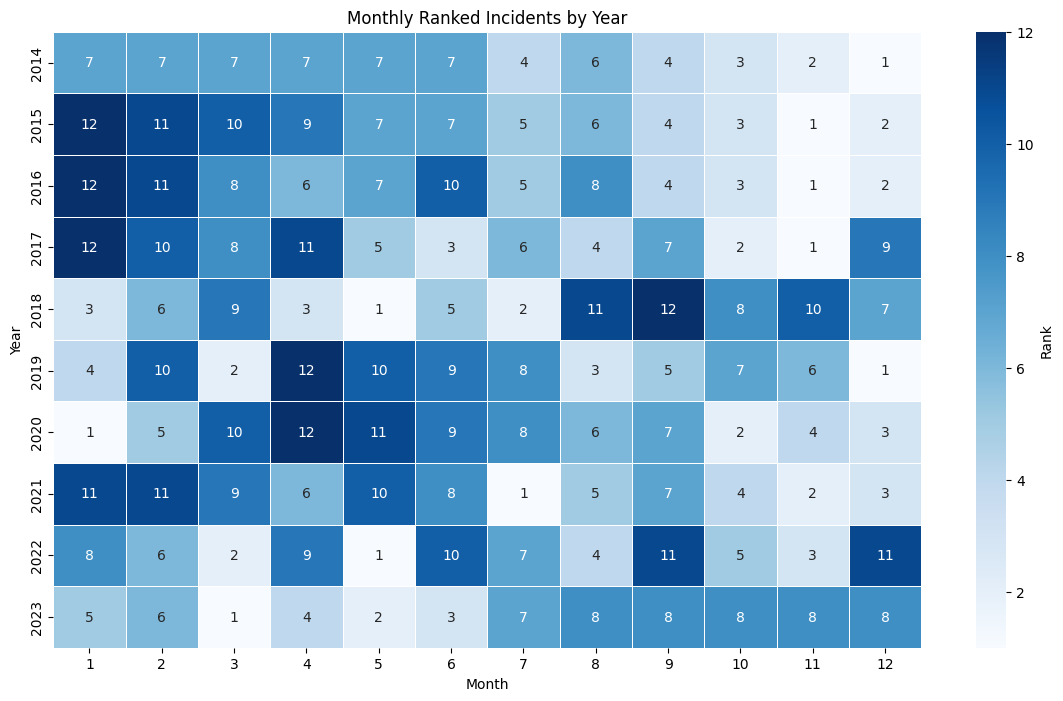

In [19]:
# Crear nuevas columnas para el año y el mes
dataframe['Año'] = dataframe['FE_OCURRENCIA'].dt.year
dataframe['Mes'] = dataframe['FE_OCURRENCIA'].dt.month

# Agrupar los datos por año y mes y contar los siniestros
siniestros_por_mes = dataframe.groupby(['Año', 'Mes']).size().reset_index(name='Cantidad')
accidentes_por_mes = dataframe.groupby(['Año', 'Mes']).size().reset_index(name='Cuenta')

# Ordenar los meses para cada año en función de la cantidad de accidentes
ranking_meses = accidentes_por_mes.sort_values(['Año', 'Cuenta'], ascending=[True, False])

# Crear una tabla pivot para facilitar la visualización
pivot_table = siniestros_por_mes.pivot(index='Mes', columns='Año', values='Cantidad')

# Visualización de siniestros por mes a lo largo de los años
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, fmt="g", cmap='Blues')
plt.title('Cantidad de Siniestros por Mes a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Mes')
plt.show()

# Crear la segunda pivot table con los datos
pivot_table = accidentes_por_mes.pivot(index='Año', columns='Mes', values='Cuenta').fillna(0)

# Normalizar los datos para obtener los rankings
ranks = pivot_table.rank(axis=1, method='min', ascending=False)

# Crear el gráfico
plt.figure(figsize=(14, 8))
sns.heatmap(ranks, annot=True, fmt="g", cmap='Blues', linewidths=.5, cbar_kws={'label': 'Rank'})
plt.title('Monthly Ranked Incidents by Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()





15. ¿Qué días de a semana tienen la mayor incidencia de siniestros?



In [20]:
# Crear una nueva columna para el día de la semana
dataframe['Día_Semana'] = dataframe['FE_OCURRENCIA'].dt.day_name(locale='es_ES')

# Contar la cantidad de siniestros por día de la semana
dias_frecuencia = dataframe['Día_Semana'].value_counts()

# Mostrar los resultados
print("Frecuencia de siniestros por día de la semana:")
print(dias_frecuencia)

# Determinar los días con mayor incidencia
dias_mayor_incidencia = dias_frecuencia[dias_frecuencia == dias_frecuencia.max()].index.tolist()

print(f"Los días con mayor incidencia de siniestros son: {', '.join(dias_mayor_incidencia)}")

Frecuencia de siniestros por día de la semana:
Día_Semana
Martes       2929
Lunes        2834
Viernes      2801
Miércoles    2738
Jueves       2659
Sábado       2311
Domingo      2016
Name: count, dtype: int64
Los días con mayor incidencia de siniestros son: Martes


16. ¿En qué ciudades ocurren más siniestros?



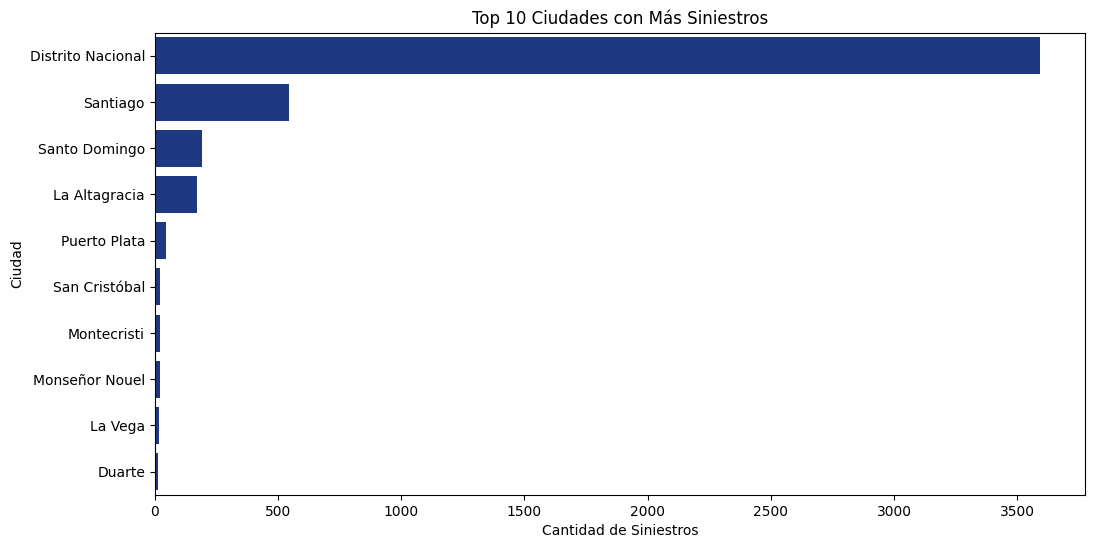

In [21]:
data_filtered = dataframe[(dataframe['DE_CIUDAD'] != ' ') & (dataframe['DE_CIUDAD'] != '') & (dataframe['DE_CIUDAD'] != 0)  & (dataframe['DE_CIUDAD'] != 'Otro')]

# Agrupar los datos por ciudad y contar la cantidad de siniestros
ciudad_accidents = data_filtered['DE_CIUDAD'].value_counts().reset_index()
ciudad_accidents.columns = ['DE_CIUDAD', 'ID _ SINIESTRO']

# Mostrar las 10 ciudades con más siniestros
top_cities = ciudad_accidents.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='ID _ SINIESTRO', y='DE_CIUDAD', data=top_cities, color='#0d3293')
plt.title('Top 10 Ciudades con Más Siniestros')
plt.xlabel('Cantidad de Siniestros')
plt.ylabel('Ciudad')
plt.show()

17. ¿Cuáles son las causas más comunes de los siniestros? 


In [22]:
data_filtered = dataframe[(dataframe['De_Causa_Detalle'] != ' ') & (dataframe['De_Causa_Detalle'] != '') & (dataframe['De_Causa_Detalle'] != 0) & (dataframe['De_Causa_Detalle'] != '0') & (dataframe['De_Causa_Detalle'] != 'No Registrado')]
# Agrupar los datos por causa y contar la cantidad de siniestros
causa = data_filtered['De_Causa_Detalle'].value_counts().reset_index()
causa.columns = ['De_Causa_Detalle', 'ID _ SINIESTRO']

# Mostrar las causas más comunes de los siniestros
top_causas = causa.head(5)
print(top_causas)

                           De_Causa_Detalle  ID _ SINIESTRO
0                          Accidente/Choque           12631
1          Rotura de Vidrios y/o Parabrisas            2830
2    Responsabilidad Civil Personas o Cosas            2003
3  Robo o Hurto Accesorios/ Partes o Piezas             341
4                   Hechos de la Naturaleza             108



18. ¿Qué tipo de eventos catastróficos son más frecuentes? 


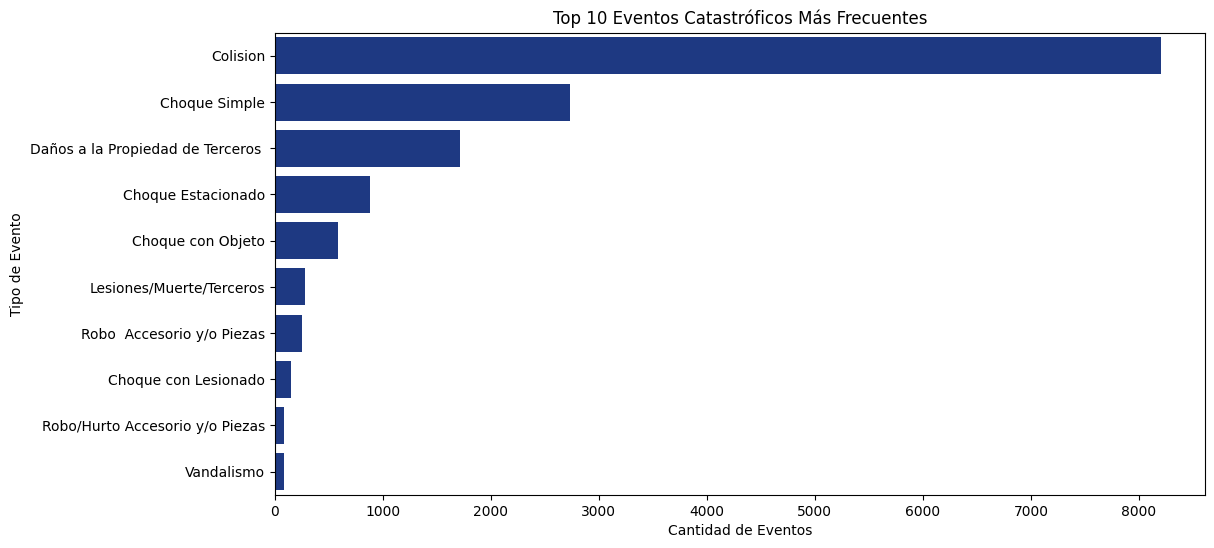

In [23]:
# Filtrar los datos para excluir valores en blanco o con 0
data_filtered = dataframe[(dataframe['EVENTO_CATASTROFICO'] != ' ') & (dataframe['EVENTO_CATASTROFICO'] != '') & (dataframe['EVENTO_CATASTROFICO'] != 0) & (dataframe['EVENTO_CATASTROFICO'] != '0') & (dataframe['EVENTO_CATASTROFICO'] != 'No Registrado')].copy()

# Reemplazar valores que considero que representan el mismo valor de EVENTO_CATASTROFICO para combinarlos
data_filtered.loc[:, 'EVENTO_CATASTROFICO'] = data_filtered['EVENTO_CATASTROFICO'].replace(
    {'Robo Accesorio y/o Piezas': 'Robo/Hurto Accesorio y/o Piezas',
     'Hurto  Accesorio y/o Piezas': 'Robo/Hurto Accesorio y/o Piezas',
     'Lesiones y/o Muerte Pasajero/Terceros/ Daños a la Propiedad de Terceros': 'Lesiones/Muerte/Terceros',
     'Lesiones y/o Muerte a  Terceros': 'Lesiones/Muerte/Terceros'})

# Contar la cantidad de ocurrencias de cada tipo de evento
evento = data_filtered['EVENTO_CATASTROFICO'].value_counts().reset_index()
evento.columns = ['EVENTO_CATASTROFICO', 'ID _ SINIESTRO']
top_evento = evento.head(10)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='ID _ SINIESTRO', y='EVENTO_CATASTROFICO', data=top_evento, color='#0d3293')
plt.title('Top 10 Eventos Catastróficos Más Frecuentes')
plt.xlabel('Cantidad de Eventos')
plt.ylabel('Tipo de Evento')
plt.show()

19. ¿Se observan tendencias en las causas de los siniestros a lo largo del tiempo?

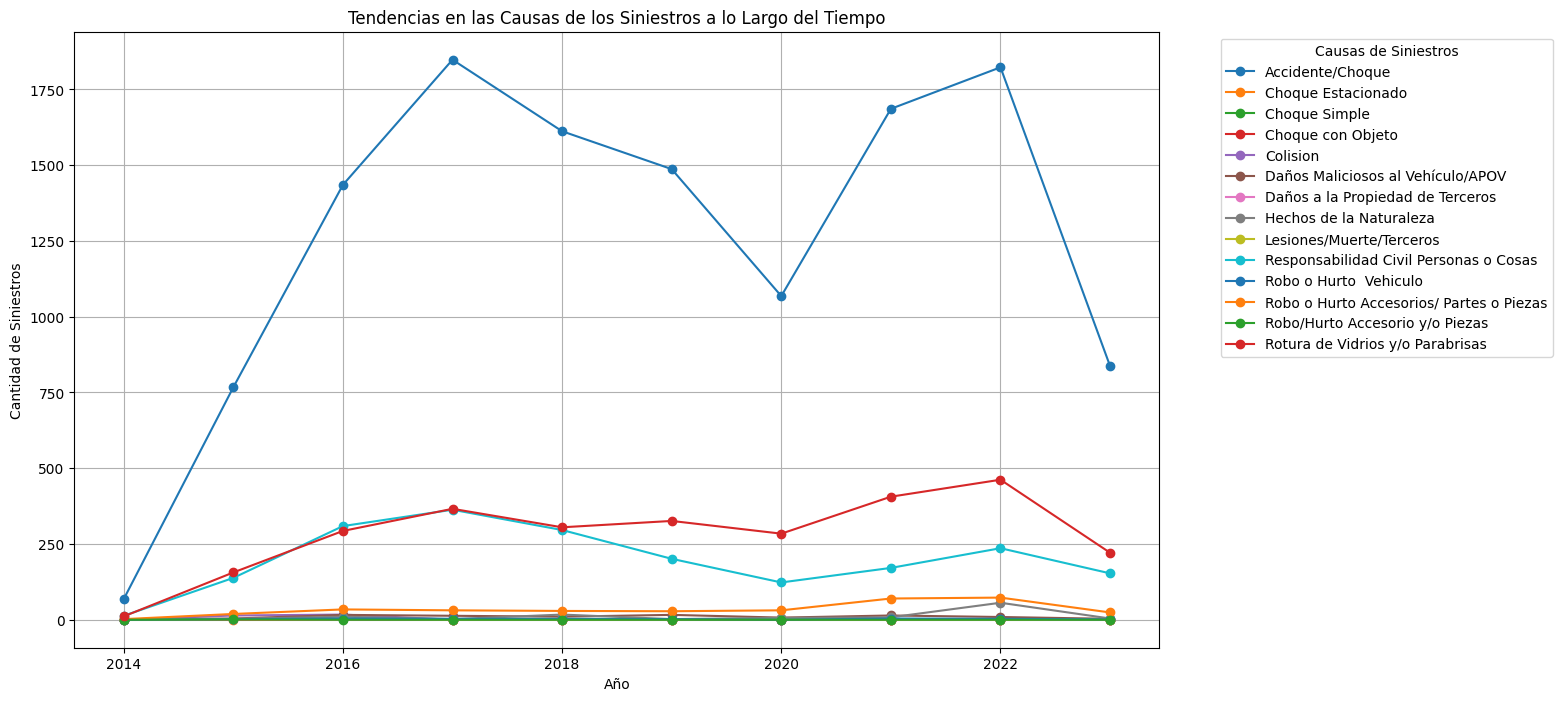

In [24]:
# Filtrar los datos para excluir valores en blanco o con 0
data_filtered = dataframe[(dataframe['De_Causa_Detalle'] != ' ') & (dataframe['De_Causa_Detalle'] != '') & (dataframe['De_Causa_Detalle'] != 0) & (dataframe['De_Causa_Detalle'] != '0') & (dataframe['De_Causa_Detalle'] != 'No Registrado')].copy()

# Reemplazar valores que considero que representan el mismo valor de EVENTO_CATASTROFICO para combinarlos
data_filtered.loc[:, 'De_Causa_Detalle'] = data_filtered['De_Causa_Detalle'].replace(
    {'Robo Accesorio y/o Piezas': 'Robo/Hurto Accesorio y/o Piezas',
     'Hurto  Accesorio y/o Piezas': 'Robo/Hurto Accesorio y/o Piezas',
     'Robo o Hurto Accesorios/Partes o Piezas': 'Robo/Hurto Accesorio y/o Piezas',
     'Lesiones y/o Muerte Pasajero/Terceros/ Daños a la Propiedad de Terceros': 'Lesiones/Muerte/Terceros',
     'Lesiones y/o Muerte a  Terceros': 'Lesiones/Muerte/Terceros'})

# Extraer el año de la fecha de ocurrencia
dataframe['Año'] = dataframe['FE_OCURRENCIA'].dt.year

# Contar la cantidad de siniestros por año y por causa
tendencias_causas = data_filtered.groupby(['Año', 'De_Causa_Detalle']).size().unstack(fill_value=0)

# Visualizar las tendencias a lo largo del tiempo para cada causa
tendencias_causas.plot(figsize=(14, 8), marker='o')
plt.title('Tendencias en las Causas de los Siniestros a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Cantidad de Siniestros')
plt.legend(title='Causas de Siniestros', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()